# Module 1: Optimization by Hand

## 1 Dataset
Defined in the file A1_Data_ILG.csv

## 2 General Linear Equation
2a. z = w_1 * x_1 + w_2 * x_2 + w_3 * x_3 + b
2b. z = w^T * x + b
2c. The w values represent the weights of each of the inputs. 
2d. The b value represents the bias.

## 3. Plot the Data

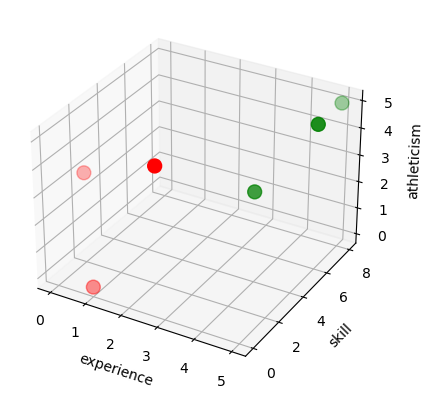

In [8]:
# plot the data in A1_Data_ILG.csv

import pandas as pd
import matplotlib.pyplot as plt

# read the data
df = pd.read_csv('A1_Data_ILG.csv')

fig = plt.figure()
ax = plt.axes(projection='3d')

x1 = df['experience']
x2 = df['skill']
x3 = df['athleticism']
y = df['label']

# convert good to green and bad to red for the labels
y = y.replace('good', 'green')
y = y.replace('bad', 'red')

# plot the data with different colors for each label
ax.scatter3D(x1, x2, x3, s=100, c=y)

# add labels
ax.set_xlabel('experience')
ax.set_ylabel('skill')
ax.set_zlabel('athleticism')

plt.show()


## 4. Visual Grouping
The data does not appear to have strong clusters or groups, likely because there are only 7 data points and they are relatively dispersed. However, the data does seem linearly separable--all of the bad players are on the left, with the good players on the right. 

## 5. Sigmoid Function
5a. The sigmoid function is defined as 1/(1+e^-z) as well as e^z/(1+e^z)
5b. Proof that these are equivalent:
```math
        1/(1+e^-z) = (1+e^z)/(1+e^z) * 1/(1+e^-z) 
                = (1+e^z)/(1+e^z+e^z) 
                = (1+e^z)/(1+e^z) * e^z/(1+e^z) 
                = e^z/(1+e^z)
```
                

In [11]:
# Normalize the Data

df = pd.read_csv('A1_Data_ILG.csv')

x1 = df['experience']
x2 = df['skill']
x3 = df['athleticism']
y = df['label']

df_norm = df.copy()
df_norm['experience'] = (x1 - x1.min()) / (x1.max() - x1.min())
df_norm['skill'] = (x2 - x2.min()) / (x2.max() - x2.min())
df_norm['athleticism'] = (x3 - x3.min()) / (x3.max() - x3.min())

df_norm.to_csv('A1_Data_ILG_norm.csv', index=False)

print(df_norm)

   experience  skill  athleticism label
0         1.0   1.00          1.0  good
1         0.8   0.50          0.6  good
2         0.4   0.25          0.8   bad
3         0.0   0.25          0.6   bad
4         1.0   0.75          1.0  good
5         0.2   0.00          0.0   bad



## 6. Run the First Epoch
6a. Weight vector: `[w_1, w_2, w_3] = [1, 1, 1]`  
6b. Calculate the vector z:
```math
 z  = w^T * x + b
    = [ 1.0,1.00,1.0,
        0.8,0.50,0.6,      [ 1,
        0.4,0.25,0.8,   *    1,  +  0
        0.0,0.25,0.6,        1 ]
        1.0,0.75,1.0,
        0.2,0.00,0.0 ]
        
    = [ 3.00,
        1.90,
        1.45,
        0.85,
        2.75,
        0.20 ]
```
6c. Apply the activation function to get y^.
```math
y^ = sigmoid(z) 
    = 1/(1+e^-z) = 
    = [ (1 + e^-3.00)^-1,
        (1 + e^-1.90)^-1,  
        (1 + e^-1.45)^-1,
        (1 + e^-0.85)^-1,
        (1 + e^-2.75)^-1,
        (1 + e^-0.20)^-1 ]

    = [ 0.9526, 
        0.8706, 
        0.8101, 
        0.7000, 
        0.9404, 
        0.5498 ]
```

6d. Compare y^ with y. 
```math

  [ 1,   
    1,
y = 0,
    0, 
    1, 
    0 ]

            [ 1,   
              1,
y^(rounded) = 1,
              1, 
              1, 
              1 ]
```
Only 3 of the 6 predictions were correct, for rows 1, 2, and 5. This is a 50% accuracy rate, which is just as bad as randomly guessing. Therefore, y^ is not a good predictor of y. 

6e. What's next? We can adjust our parameters w and b to improve our predictions. In order to determine how to adjust them, we can define a loss function to measure how far off y^ is from y. We can then find the gradient of the loss function with respect to our parameters, and change our parameters in the direction of the gradient to minimize the loss. 


## 7. Loss Function

7a. Binary Cross Entropy Function:
```math
LCE(y^, y) = 1/N SUM_i^N {-yi * log(y^i) - (1-yi) * log(1-y^i)}
```

7b. Calculate the Binary Cross Entropy Loss for the first epoch:
```math
LCE_1(y^1, y1) = - y1 * log(y^1) - (1-y1) * log(1-y^1) = - 1 * log(0.9526) - (1-1) * log(1-0.9526) = -log(0.9526) = 0.0482
LCE_2(y^2, y2) = - y2 * log(y^2) - (1-y2) * log(1-y^2) = - 1 * log(0.8706) - (1-1) * log(1-0.8706) = -log(0.8706) = 0.1386
LCE_3(y^3, y3) = - y3 * log(y^3) - (1-y3) * log(1-y^3) = - 0 * log(0.8101) - (1-0) * log(1-0.8101) = -log(0.1899) = 1.6613
LCE_4(y^4, y4) = - y4 * log(y^4) - (1-y4) * log(1-y^4) = - 0 * log(0.7000) - (1-0) * log(1-0.7000) = -log(0.3000) = 1.2040
LCE_5(y^5, y5) = - y5 * log(y^5) - (1-y5) * log(1-y^5) = - 1 * log(0.9404) - (1-1) * log(1-0.9404) = -log(0.9404) = 0.0614
LCE_6(y^6, y6) = - y6 * log(y^6) - (1-y6) * log(1-y^6) = - 0 * log(0.5498) - (1-0) * log(1-0.5498) = -log(0.4502) = 0.7981

LCE(y^, y) = 1/N SUM_i^N LCE_i = (0.0482 + 0.1386 + 1.6613 + 1.2040 + 0.0614 + 0.7981)/6 = 0.6519
```

7c. Given this, my current loss is my average cross entropy loss, 0.6519. This is not very good, as we want the LCE to approach 0. To improve this, I would adjust my weights and bias to get my predictions closer to the actual values. If the LCE is 0, that means that my predictions exactly match the actual values. 



## 8. Try Again with New Weights
I know that skill, experience, and athleticism are all positively correlated with player rating, so I know that I want to keep my weights positive. All players only spanned a narrow range of predicted values, so I think I can increase my weights to differentiate them more. Every player was rated good in the last iteration, so I also need to adjust my bias downwards. I will then double the weights and try a bias of -3. I will try the following weights and bias:
```math
w = [2, 2, 2]
b = -4
```

Recalculating the vector z:
```math
 z  = w^T * x + b
    = [ 1.0,1.00,1.0,
        0.8,0.50,0.6,      [ 2,
        0.4,0.25,0.8,   *    2,  -  3
        0.0,0.25,0.6,        2 ]
        1.0,0.75,1.0,
        0.2,0.00,0.0 ]
        
    = [  3.0,
         0.8,
        -0.1,
        -1.3,
         2.5,
        -2.6 ]
```
Now apply the activation function to get y^.
```math
y^ = sigmoid(z) 
    = 1/(1+e^-z) = 
    = [ (1 + e^-3.0)^-1,
        (1 + e^-0.8)^-1,  
        (1 + e^0.1)^-1,
        (1 + e^1.3)^-1,
        (1 + e^-2.5)^-1,
        (1 + e^2.6)^-1 ]

    = [ 0.9526, 
        0.6900, 
        0.4750, 
        0.2142, 
        0.9241, 
        0.0691 ]
```
Now recalculate the average loss using binary cross entropy:
```math
LCE_2(y^2, y2) = - y2 * log(y^2) - (1-y2) * log(1-y^2) = - 1 * log(0.9526) - (1-1) * log(1-0.9526) = -log(0.9526) = 0.0486
LCE_1(y^1, y1) = - y1 * log(y^1) - (1-y1) * log(1-y^1) = - 1 * log(0.6900) - (1-1) * log(1-0.6900) = -log(0.6900) = 0.3711
LCE_3(y^3, y3) = - y3 * log(y^3) - (1-y3) * log(1-y^3) = - 0 * log(0.4750) - (1-0) * log(1-0.4750) = -log(0.5250) = 0.6444
LCE_4(y^4, y4) = - y4 * log(y^4) - (1-y4) * log(1-y^4) = - 0 * log(0.2142) - (1-0) * log(1-0.2142) = -log(0.7858) = 0.2410
LCE_5(y^5, y5) = - y5 * log(y^5) - (1-y5) * log(1-y^5) = - 1 * log(0.9241) - (1-1) * log(1-0.9241) = -log(0.9241) = 0.0789
LCE_6(y^6, y6) = - y6 * log(y^6) - (1-y6) * log(1-y^6) = - 0 * log(0.0691) - (1-0) * log(1-0.0691) = -log(0.9309) = 0.0716

LCE(y^, y) = 1/N SUM_i^N LCE_i = (0.0486 + 0.3711 + 0.6444 + 0.2410 + 0.0789 + 0.0716)/6 = 0.2426
```
My new loss is 0.2426, which is much better than my previous loss of 0.6519. This means that my predictions are much closer to the actual values, so I was right about how to change my weights!

## 9. Calculate the Gradient

9a1. Find the partial derivate of the LCE with respect to the weight vector w:

```math
dLCE/dw = dLCE/dy^ * dy^/dz * dz/dw

    dLCE/dy^= d/dy^ (1/N (-y * log(y^) - (1-y) * log(1-y^)))
            = 1/N (-y * (1/y^) - (1-y) * (-1/(1-y^)))
            = 1/N (-y/y^ + (1-y)/(1-y^))

    dy^/dz = d/dz (1/(1+e^-z))
           = d/dz (1+e^-z)^-1
           = -(1+e^-z)^-2 * d/dz (1+e^-z)
           = -(1+e^-z)^-2 * -e^-z
           = e^-z/(1+e^-z)^2
           = 1/(1+e^-z) * e^-z/(1+e^-z)
           = y^ * (1+e^-z-1)/(1+e^-z)
           = y^ * (1-y^)

     dz/dw = d/dw (w^T * x + b)
           = x

dLCE/dw = dLCE/dy^ * dy^/dz * dz/dw
        = 1/N (-y/y^ + (1-y)/(1-y^)) * y^ * (1-y^) * x
        = 1/N (-y*y^*(1-y)/y^ + (1-y)*y^*(1-y^)/(1-y^)) * x
        = 1/N (-y*(1-y) + (1-y)*y^) * x
        = 1/N (-y + y^y + y^ - y^y) * x
        = 1/N (y^ - y)^T * x

dLCE/dw = 1/N (y^ - y)^T * x
```

9a2. Find the partial derivate of the LCE with respect to the bias b:
```math

dLCE/db = dLCE/dy^ * dy^/dz * dz/db

  dLCE/dy^ = 1/N (-y/y^ + (1-y)/(1-y^))

    dy^/dz = y^ * (1-y^)

     dz/db = d/db (w^T * x + b)
           = 1

dLCE/db = dLCE/dy^ * dy^/dz * dz/dw
        = 1/N (-y/y^ + (1-y)/(1-y^)) * y^ * (1-y^) * 1
        = 1/N (y^ - y) * 1

dLCE/db = 1/N (y^ - y)
```
9b. What do these derivatives mean in a few sentences?

9b1. The partial derivative of the loss function with respect to w is proportional to:
- The difference between the predicted value and the actual value -- the closer these two values are, the smaller the derivative will be. This makes sense since that's our objective. It also flips the sign of the gradient if we overshoot in our prediction. 
- The inverse of the sample size -- the larger the sample size, the smaller the derivative will be. This makes sense since the larger the sample size, less sensitive it is to a given input, so the less we want to change the weight.
- The input value X -- the smaller the input value, the smaller the derivative will be. This makes sense since the smaller the input value, the less it will affect the output value, so the less we want to change the weight. Also, if it's negative, it will flip the direction of the gradient.

9b2. The partial derivative of the loss function with respect to b is proportional to:
- The first two above factors
- It does not depend on the input value X, since the bias term isn't multiplied by the inputs.



## 10. Run the Second Epoch with Gradient Descent

10a. Calculate the new weights given the gradient and learning rate of 1:
```math
dLCE/dw = 1/N (y^ - y)^T * x

        y^ - y = [ 0.9526, 0.8699, 0.8100, 0.7006, 0.9399, 0.5498 ] - [ 1, 1, 0, 0, 1, 0 ] = [ -0.0474, -0.1301, 0.8100, 0.7006, -0.0601, 0.5498 ]

dLCE/dw = 1/6 * [ -0.0474, -0.1301, 0.8100, 0.7006, -0.0601, 0.5498 ] * [1	1	1
                                                                         0.8	0.5	0.6
                                                                         0.4	0.25	0.8
                                                                         0	0.25	0.6
                                                                         1	0.75	1
                                                                         0.2	0	0   ]

        = 1/6 * [0.2224, 0.2201, 0.8828]
        = [0.0371, 0.0367, 0.1471]

w2 = w1 - LR * dLCE/dw 
   = [1, 1, 1] - 1 * [0.0371, 0.0367, 0.1471]
   = [0.9629, 0.9633, 0.8529]
```
10b. Run another epoch with the updated weights.

Given the new weights w2, calculate the new z values:
```math
 z  = w^T * x + b
    = [ 1.0,1.00,1.0,
        0.8,0.50,0.6,      [ 0.9629,
        0.4,0.25,0.8,   *    0.9633,  -  0
        0.0,0.25,0.6,        0.8529 ]
        1.0,0.75,1.0,
        0.2,0.00,0.0 ]
        
    = [ 2.7791,
        1.7637,
        1.3083,
        0.7526,
        2.5383,
        0.1926 ]
```
Given the new z values, calculate the new y^ values:
```math
y^ = sigmoid(z) 
    = 1/(1+e^-z) = 
    = [ (1 + e^-2.7791)^-1,
        (1 + e^-1.7637)^-1,  
        (1 + e^-1.3083)^-1,
        (1 + e^-0.7526)^-1,
        (1 + e^-2.5383)^-1,
        (1 + e^-0.1926)^-1 ]

    = [ 0.9415, 
        0.8537, 
        0.7872, 
        0.6797, 
        0.9268, 
        0.5480 ]
```

Given the new y^ values, calculate the new LCE:
```math
LCE_1(y^1, y1) = - y1 * log(y^1) - (1-y1) * log(1-y^1) = - 1 * log(0.9415) - (1-1) * log(1-0.9415) = -log(0.9415) = 0.0602
LCE_2(y^2, y2) = - y2 * log(y^2) - (1-y2) * log(1-y^2) = - 1 * log(0.8537) - (1-1) * log(1-0.8537) = -log(0.8537) = 0.1582
LCE_3(y^3, y3) = - y3 * log(y^3) - (1-y3) * log(1-y^3) = - 0 * log(0.7872) - (1-0) * log(1-0.7872) = -log(0.2128) = 1.5475
LCE_4(y^4, y4) = - y4 * log(y^4) - (1-y4) * log(1-y^4) = - 0 * log(0.6797) - (1-0) * log(1-0.6797) = -log(0.3203) = 1.1386
LCE_5(y^5, y5) = - y5 * log(y^5) - (1-y5) * log(1-y^5) = - 1 * log(0.9268) - (1-1) * log(1-0.9268) = -log(0.9268) = 0.0760
LCE_6(y^6, y6) = - y6 * log(y^6) - (1-y6) * log(1-y^6) = - 0 * log(0.5480) - (1-0) * log(1-0.5480) = -log(0.4520) = 0.7941

LCE(y^, y) = 1/N SUM_i^N LCE_i = (0.0602 + 0.1582 + 1.5475 + 1.1386 + 0.0760 + 0.7941)/6 = 0.6291
```
10c. My new loss after updating the weights is 0.6291, which is better than the original loss of 0.6519! This is really interesting since I think that larger weights would actually improve the loss, as shown in problem #8. However, it seems that smaller weights improved the loss because it brought the predictions closer to 0, which brought bad players closer to negative z values. I suspect that the weights will get smaller and smaller until the bias term is negative enough, then the weights will increase. I hope that's actually the case when I code it with more epochs below!



## 11. Hand Code a Logistic Regression Model
(a) Read in any .csv labeled dataset where the Label is called "LABEL". 
(b) Your code should create "y" (the label) as a numpy array of 0 and 1. So, if the labels are originally something like POS and NEG, you r code will need to determine this, and then update all POS to 1 and all NEG to 0. Your code should be able to do this for any two label options.  
(c) Your code will also create X which is the entire dataset (without the labels) as a numpy array.  
(d) Your code will initialize w and b and a learning rate.  
(e) Your code will need to contain a function for Sigmoid and for z, etc.  
(f) Your code will then need to perform gradient descent to optimize (reduce) LCE.  
(g) Be sure that your code can run iteratively for as many epochs as you wish.  
(h) Show a final confusion matrix (see example below) AND show a graph of how the LCE reduces as epochs iterate (see example below)  
Recommended: Use your code to see if your by-hand results from above are right.

In [68]:
import numpy as np
import pandas as pd

def read_data(path):
    """read in data from a file path
    path is a string pointing to a local directory
    the data file should be a csv
    prints the top rows of the datafile
    returns a pandas dataframe of the csv
    """
    print('Reading in data from ' + path + '...')
    df = pd.read_csv(path)
    print('Data loaded. Here is a sneak peak: \n', df.head())
    return df


def clean_data(df):
    """clean the data
    Takes in a dataframe df
    Returns two numpy arrays x and y
    x is inputs normalized between 0-1
    y is labels converted to 0 or 1
    """
    print('Now cleaning the data.')
    # get the size of the matrix
    nrows = df.shape[0]
    ncols = df.shape[1]
    print('The shape of the data is: ', df.shape)
    
    # intialize x and y
    x = np.empty((nrows,ncols-1))
    y = np.empty((nrows,1))

    # separate labels
    if 'LABEL' in df.columns:
        y = np.array(df['LABEL'])
        x = np.array(df[df.columns.difference(['LABEL'])])
    elif 'label' in df.columns:
        y = np.array(df['label'])
        x = np.array(df[df.columns.difference(['label'])])
    else:
        raise Exception('There is no column with the title label in the data')
    print('x is: \n', x)
    print('y is: \n', y)
    
    # convert labels to 0 or 1
    y = convert_labels(y)
    print('New y is : \n', y)
    
    # normalize x
    x = normalize(x)
    print('New x is : \n', x)

    # return x and y
    return x, y


def convert_labels(y):
    """converts y labels
    accepts in a numpy array with binary values
    converts the first value to 0, all others to 1
    returns a numpy array of 0s and 1s
    """
    print('Converting labels to 0,1...')
    y_values = set(y)
    y_value_0 = list(y_values)[0]
    y_value_1 = list(y_values)[1]

    y[y == y_value_0] = 0
    y[y == y_value_1] = 1
    return y

def normalize(x):
    """normalizes x values
    accepts a numpy array of floats
    converts them to a max of 1 and min of 0
    returns a numpy array
    """
    print('Normalizing x values...')
    xrows = x.shape[0]
    xcols = x.shape[1]
    xnorm = np.empty((xrows, xcols))
    for j, column in enumerate(x.T):
        max = column.max()
        min = column.min()
        for i, item in enumerate(column):
            xnorm[i,j] = (item - min)/(max - min)
    return xnorm

def logistic_regression(x, y, learning_rate = 0.1, epochs = 100):
    """run logistic regression on the input data
    accepts the inputs, labels, LR, and # of epochs
    runs logistic regression for the given number of epochs
    graphs the error rate over time
    graphs the confusion matrix for the final predictions
    """
    print('Running logistic regression...')
    
    # initialize the weights and the bias
    xcols = x.shape[1]
    w = np.ones((1, xcols))
    b = 0
    print('The initial weights are: \n', w)
    print('The initial bias is: ', b)
    
    # compute z = x * w^T + b
    z = x @ w.T + b
    print('The initial z vector is: \n', z) 

    y_hat = 1/(1+np.exp(-z))
    print('The initial y_hat is: \n', y_hat)

    # calculate the loss

    # calculate the gradient

    # calculate the new weights

    # repeat for n epochs
    return

def main():
    """main function
    Entrypoint to the file
    Calls all other functions
    """
    df = read_data('A1_Data_ILG.csv')
    x, y = clean_data(df)
    LR = 0.2
    epochs = 10
    logistic_regression(x, y, LR, epochs)
    return

main()

Reading in data from A1_Data_ILG.csv...
Data loaded. Here is a sneak peak: 
    experience  skill  athleticism label
0           5      8            5  good
1           4      4            3  good
2           2      2            4   bad
3           0      2            3   bad
4           5      6            5  good
Now cleaning the data.
The shape of the data is:  (6, 4)
x is: 
 [[5 5 8]
 [3 4 4]
 [4 2 2]
 [3 0 2]
 [5 5 6]
 [0 1 0]]
y is: 
 ['good' 'good' 'bad' 'bad' 'good' 'bad']
Converting labels to 0,1...
New y is : 
 [1 1 0 0 1 0]
Normalizing x values...
New x is : 
 [[1.   1.   1.  ]
 [0.6  0.8  0.5 ]
 [0.8  0.4  0.25]
 [0.6  0.   0.25]
 [1.   1.   0.75]
 [0.   0.2  0.  ]]
Running logistic regression...
The initial weights are: 
 [[1. 1. 1.]]
The initial bias is:  0
The initial z vector is: 
 [[3.  ]
 [1.9 ]
 [1.45]
 [0.85]
 [2.75]
 [0.2 ]]
The initial y_hat is: 
 [[0.95257413]
 [0.86989153]
 [0.80999843]
 [0.70056714]
 [0.93991335]
 [0.549834  ]]
